<a href="https://colab.research.google.com/github/rkhuran/SOFR-/blob/master/SOFR_Vasicek_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving SOFR.csv to SOFR (1).csv


In [0]:
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(uploaded['SOFR.csv']))

In [0]:
df2.head()

,DATE,RATE,1ST (PERCENT),25TH (PERCENT),75TH (PERCENT),99TH (PERCENT),VOLUME (US$BILLIONS)
0,9/27/2019,1.82,1.75,1.80,1.88,1.96,1084.00
1,9/26/2019,1.85,1.78,1.82,1.90,2.03,1092.00
2,9/25/2019,2.01,1.80,2.00,2.10,2.23,1080.00
3,9/24/2019,1.96,1.89,1.94,2.02,2.10,1085.00
4,9/23/2019,1.85,1.80,1.82,1.91,2.10,1140.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


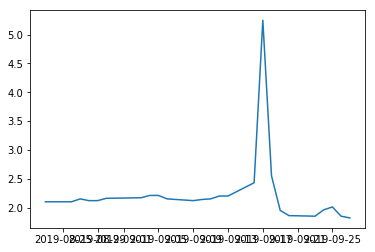

In [0]:
df2["DATE"]= pd.to_datetime(df2["DATE"], errors='coerce', infer_datetime_format=False)
df2["RATE"] = df2["RATE"].convert_objects(convert_numeric=True)
x=df2["DATE"]
y=df2["RATE"]
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

In [0]:
#SOFR Interest Rates - Mean and Variance of last 30 days

mean=np.mean(df2['RATE'])
sigma= np.var(df2['RATE'])

print("Average SOFR Rate for last 30 Days:",np.round(mean,4))
print("Volatility in SOFR for last 30 Days:",np.round(sigma,4))



Average SOFR Rate for last 30 Days: 2.2332
Volatility in SOFR for last 30 Days: 0.4066


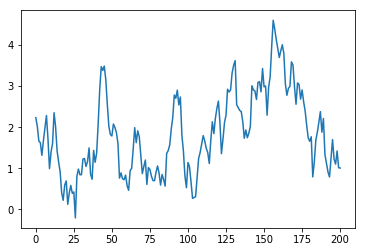

In [123]:
""" Simulate interest rate path by the Vasicek model """
import numpy as np

def vasicek(r0, a, b, sigma, T=1., N=10, seed=777):    
    np.random.seed(seed)
    dt = T/float(N)    
    rates = [r0]
    for i in range(N):
        dr = a*(b-rates[-1])*dt + sigma*np.random.normal()
        rates.append(rates[-1] + dr)
    return range(N+1), rates

if __name__ == "__main__":
    x, y = vasicek(mean, 0.20, 0.01, sigma, 10., 200)

    import matplotlib.pyplot as plt
    plt.plot(x,y)
    plt.show()